<a href="https://colab.research.google.com/github/shriya-tiwari/NLP-B_Tech_Project/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [ ]:
fdataset=pd.read_excel("/content/gdrive/My Drive/hourlydataset.xlsx" )

In [ ]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Actual total power consumption')
    plt.plot(predicted, color='blue',label='Predicted total power consumption')
    plt.plot(figsize=(100,10))
    plt.title('Total power consumption Prediction')
    plt.xlabel('Time')
    plt.ylabel('Total power consumption')
    plt.legend()
    plt.show()

def return_mse(test,predicted):
    mse = mean_squared_error(test, predicted)
    print("The root mean squared error is {}.".format(mse))

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

def return_mae(test, predicted):
    mae = mean_absolute_error(test, predicted)
    print("The mean absolute error is {}.".format(mae))

def return_mape(test, predicted):
    mape = mean_absolute_percentage_error(test, predicted)
    print("The mean absolute percentage error is {}.".format(mape))

def return_r2(test, predicted):
    mape = r2_score(test, predicted)
    print("The mean R2 score is {}.".format(mape))

In [ ]:
training_set = fdataset.iloc[:7774,1:2].values
test_set = fdataset.iloc[7774:,1:2].values

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60,7774):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=20, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=20, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=20, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=20))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
242/242 [==============================] - 36s 104ms/step - loss: 0.0296
Epoch 2/10
242/242 [==============================] - 25s 102ms/step - loss: 0.0150
Epoch 3/10
242/242 [==============================] - 25s 104ms/step - loss: 0.0137
Epoch 4/10
242/242 [==============================] - 25s 105ms/step - loss: 0.0117
Epoch 5/10
242/242 [==============================] - 24s 101ms/step - loss: 0.0100
Epoch 6/10
242/242 [==============================] - 26s 106ms/step - loss: 0.0090
Epoch 7/10
242/242 [==============================] - 24s 98ms/step - loss: 0.0083
Epoch 8/10
242/242 [==============================] - 25s 102ms/step - loss: 0.0077
Epoch 9/10
242/242 [==============================] - 24s 98ms/step - loss: 0.0072
Epoch 10/10
242/242 [==============================] - 25s 103ms/step - loss: 0.0068


In [ ]:
regressor.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
242/242 [==============================] - 25s 104ms/step - loss: 0.0065
Epoch 2/10
242/242 [==============================] - 32s 131ms/step - loss: 0.0062
Epoch 3/10
242/242 [==============================] - 25s 103ms/step - loss: 0.0061
Epoch 4/10
242/242 [==============================] - 29s 122ms/step - loss: 0.0059
Epoch 5/10
242/242 [==============================] - 24s 100ms/step - loss: 0.0058
Epoch 6/10
242/242 [==============================] - 24s 99ms/step - loss: 0.0057
Epoch 7/10
242/242 [==============================] - 24s 101ms/step - loss: 0.0056
Epoch 8/10
242/242 [==============================] - 26s 106ms/step - loss: 0.0055
Epoch 9/10
242/242 [==============================] - 25s 104ms/step - loss: 0.0053
Epoch 10/10
242/242 [==============================] - 23s 96ms/step - loss: 0.0053


In [ ]:
dataset_total = pd.concat((fdataset.iloc[:7774,1:2],fdataset.iloc[7774:,1:2]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)
print(len(inputs))

923


In [ ]:
X_test = []
for i in range(60,922):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_power_consumption = regressor.predict(X_test)
predicted_power_consumption = sc.inverse_transform(predicted_power_consumption)

27/27 [==============================] - 2s 21ms/step


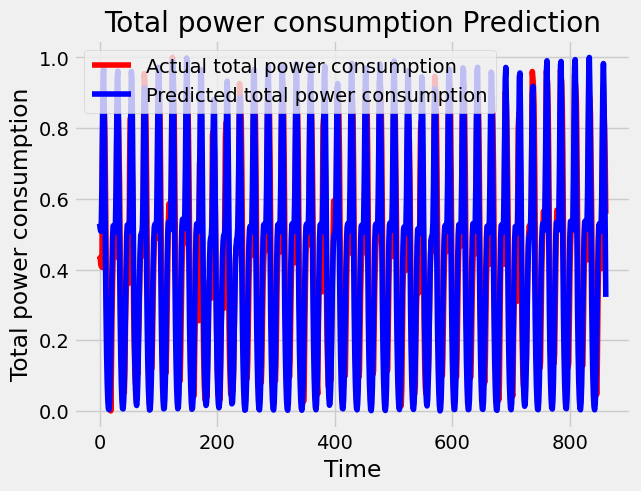

In [ ]:
test_set = fdataset.iloc[7774:8636,1:2].values
test_set = sc.fit_transform(test_set)
predicted_power_consumption = sc.fit_transform(predicted_power_consumption)
plot_predictions(test_set,predicted_power_consumption)

In [ ]:
d_X_test = []
for i in range(60,510):
    d_X_test.append(inputs[i-60:i,0])
d_X_test = np.array(d_X_test)
d_X_test = np.reshape(d_X_test, (d_X_test.shape[0],d_X_test.shape[1],1))
d_predicted_power_consumption = regressor.predict(d_X_test)
d_predicted_power_consumption = sc.inverse_transform(d_predicted_power_consumption)

15/15 [==============================] - 0s 31ms/step


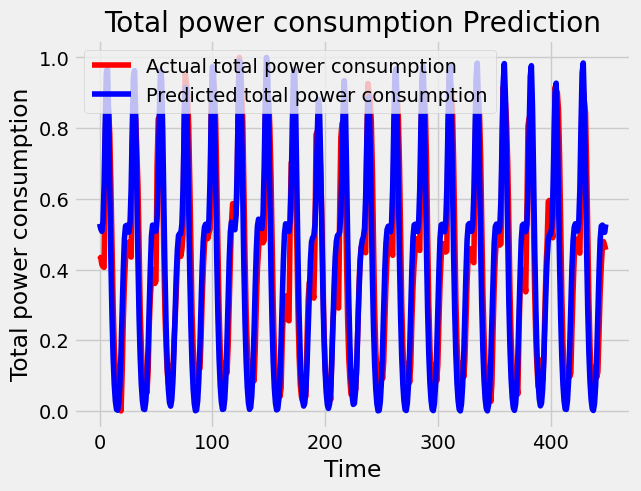

In [ ]:
d_test_set = fdataset.iloc[7774:8224,1:2].values
d_test_set = sc.fit_transform(d_test_set)
d_predicted_power_consumption = sc.fit_transform(d_predicted_power_consumption)
plot_predictions(d_test_set,d_predicted_power_consumption)

In [ ]:
return_rmse(test_set,predicted_power_consumption)

The root mean squared error is 0.11908246473277673.


In [ ]:
return_mae(test_set, predicted_power_consumption)

The mean absolute error is 0.09857030662879081.


#Text classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

In [ ]:
reviews = [
    "The product is great and works perfectly!",
    "I am really disappointed with the quality of the item.",
    "This is the best purchase I've ever made!",
    "The customer service was terrible, and I will not recommend this product.",
    "I highly recommend this product to everyone!"
]
sentiments = [1, 0, 1, 0, 1]  # 1: Positive, 0: Negative
sentiments = np.array(sentiments)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)
vocab_size = len(tokenizer.word_index) + 1

max_sequence_length = 10  # maximum length of input sequences
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)
padded_sequences = np.array(padded_sequences)

In [ ]:
# Define the LSTM model architecture
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_sequence_length))
model.add(LSTM(units=128))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(padded_sequences, sentiments, epochs=10, batch_size=32)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6902 - accuracy: 0.6000
Epoch 2/10
1/1 [==============================] - 0s 32ms/step - loss: 0.6801 - accuracy: 0.8000
Epoch 3/10
1/1 [==============================] - 0s 29ms/step - loss: 0.6693 - accuracy: 0.8000
Epoch 4/10
1/1 [==============================] - 0s 28ms/step - loss: 0.6570 - accuracy: 0.8000
Epoch 5/10
1/1 [==============================] - 0s 28ms/step - loss: 0.6426 - accuracy: 0.8000
Epoch 6/10
1/1 [==============================] - 0s 27ms/step - loss: 0.6253 - accuracy: 0.8000
Epoch 7/10
1/1 [==============================] - 0s 27ms/step - loss: 0.6044 - accuracy: 0.8000
Epoch 8/10
1/1 [==============================] - 0s 30ms/step - loss: 0.5788 - accuracy: 0.8000
Epoch 9/10
1/1 [==============================] - 0s 37ms/step - loss: 0.5477 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 26ms/step - loss: 0.5099 - accuracy: 1.0000


In [ ]:
# Make predictions
new_reviews = [
    "The product exceeded my expectations!",
    "I regret buying this item."
]
new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length)
predictions = model.predict(new_padded_sequences)


# Convert predictions to sentiment labels
sentiment_labels = ['Negative', 'Positive']
predicted_labels = [sentiment_labels[int(np.round(pred))] for pred in predictions]


# Print the new reviews and predicted sentiment labels
for i in range(len(new_reviews)):
    print('Review:', new_reviews[i])
    print('Predicted Sentiment:', predicted_labels[i])
    print('---')

1/1 [==============================] - 1s 646ms/step
Review: The product exceeded my expectations!
Predicted Sentiment: Positive
---
Review: I regret buying this item.
Predicted Sentiment: Positive
---
